## Fandango's rating system after Hickey's analysis

Journalist Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page on the online movie ratings aggregator Fandango.

He was able to find that:

- The actual rating was almost always **rounded up** to the nearest half-star. For instance, a $4.1$ movie would be rounded off to $4.5$ stars, not to $4$ stars, as you may expect.
- In the case of $8%$ of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a $4.5$ rating would be rounded off to $5$ stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of $4$ in the HTML of the page to a displayed rating of $5$ stars.

In this project, I'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")
movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")

old_rating = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
new_rating = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

old_rating.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [3]:
new_rating.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Changing the Goal of our Analysis

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

In [4]:
old_rating.sample(10, random_state = 1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


In sample for ratings for popular movies released in $2015$ we observe that all movies have over $30$ fan ratings on Fandango's website.

In [5]:
new_rating.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


This dataset doesn't provide information about the number of fan ratings, so I will search number of fan ratings on the website.

Table formed from the site data:

| movie | votes |
|---|---|
| Mechanic: Resurrection | 2250 |
| Warcraft | 7280 |
| Max Steel | 494 |
| Me Before You | 5270 |
| Fantastic Beasts and Where to Find Them | 13484 |
| Cell | 18 |
| Genius | 127 |
| Sully | 11890 |
| A Hologram for the King | 501 |
| Captain America: Civil War | 35143 |

Isolate the movies released in $2015$ and in $2016$ in a separate data sets.

In [6]:
old_rating['Year'] = old_rating['FILM'].str[-5:-1].astype(int)
rating_2015 = old_rating[old_rating['Year'] == 2015]
rating_2016 = new_rating[new_rating['year'] == 2016]

### Comparing Distribution Shapes for 2015 and 2016

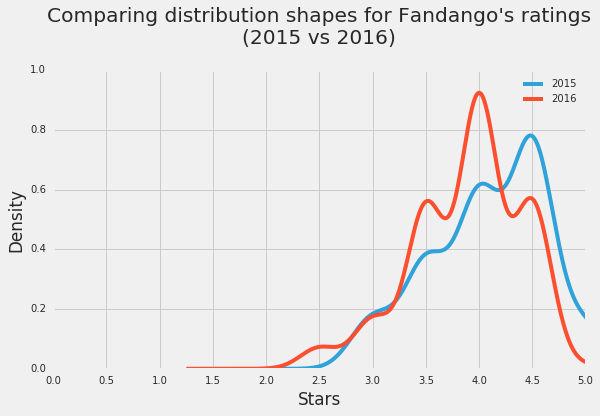

In [7]:
plt.style.use('fivethirtyeight')
rating_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8.5, 5))
rating_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

2015 Frandango's rating is left skewed. 2016 Frandango's rating is more symmetrical and close to normal distribution offset from center to right. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

In [8]:
print(rating_2015.shape)
print(rating_2016.shape)

(129, 6)
(191, 3)


Our two samples have different number of movies, so it doesn't make sense to compare the two tables using absolute frequencies. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

### Relative frequencies

In [9]:
rating_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [10]:
rating_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, most of movies had rating $4.0$ ($40$%) and in 2015 rating the most frequent assessment is $4.5$ ($38$%).

In 2015 minimum value of rating is $3.0$ and in 2016 this indicator is lower - $2.5$.

In 2015 score 5.0 occurs much more often than in 2016.

### Determining the Direction of the Change

In [11]:
mean_15 = rating_2015['Fandango_Stars'].mean()
mean_16 = rating_2016['fandango'].mean()
print(mean_15, mean_16)

4.0852713178294575 3.887434554973822


In [12]:
median_15 = rating_2015['Fandango_Stars'].median()
median_16 = rating_2016['fandango'].median()
print(median_15, median_16)

4.0 4.0


In [18]:
mode_15 = rating_2015['Fandango_Stars'].mode()[0]
mode_16 = rating_2016['fandango'].mode()[0]
print(mode_15, mode_16)

4.5 4.0


In [19]:
summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


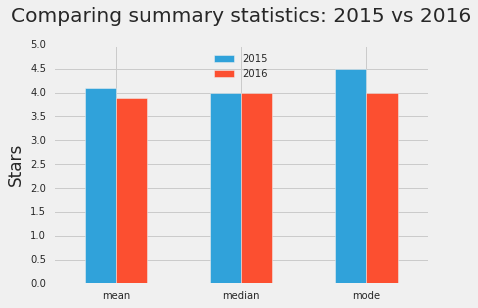

In [52]:
import numpy as np

summary.plot.bar(rot = 0)
plt.yticks(np.arange (0.0, 5.5, 0.5))
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.075)
plt.legend(framealpha = 0, loc = 'upper center')
plt.ylabel('Stars')

### Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.